In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
quantity = pd.read_csv('/content/drive/MyDrive/AI_Final_Project/CECS551_dataset_02/sales_train_evaluation.csv')
quantity

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [53]:
quantity["cat_id"].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [54]:
quantity = quantity[quantity["cat_id"]=="HOUSEHOLD"]
quantity

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
565,HOUSEHOLD_1_001_CA_1_evaluation,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,3,0,0,0,...,2,0,1,1,0,0,0,0,1,2
566,HOUSEHOLD_1_002_CA_1_evaluation,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,1,1,2,4,...,0,1,0,1,1,1,0,0,2,1
567,HOUSEHOLD_1_003_CA_1_evaluation,HOUSEHOLD_1_003,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,1,1,1,0,0,0,0,2,1
568,HOUSEHOLD_1_004_CA_1_evaluation,HOUSEHOLD_1_004,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,4,0,8,11,...,4,0,4,0,2,0,1,7,7,2
569,HOUSEHOLD_1_005_CA_1_evaluation,HOUSEHOLD_1_005,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,3,2,2,...,1,1,0,0,0,1,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29048,HOUSEHOLD_2_512_WI_3_evaluation,HOUSEHOLD_2_512,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,0,2,0,0,...,2,0,0,3,0,1,0,0,0,0
29049,HOUSEHOLD_2_513_WI_3_evaluation,HOUSEHOLD_2_513,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
29050,HOUSEHOLD_2_514_WI_3_evaluation,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
29051,HOUSEHOLD_2_515_WI_3_evaluation,HOUSEHOLD_2_515,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,0,0,0,0,...,0,0,1,4,1,0,0,0,0,0


In [55]:
price = pd.read_csv('/content/drive/MyDrive/AI_Final_Project/CECS551_dataset_02/sell_prices.csv')
price

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [56]:
# Trimming the database to 1st year

df = pd.DataFrame()
df["id"] = quantity["id"]
df["item_id"] = quantity["item_id"]
sum= pd.DataFrame()
for n in range(1, 366):
  df[f"d_{n}"] = quantity[f"d_{n}"]

df

<ipython-input-56-61df6ef67aa4>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"d_{n}"] = quantity[f"d_{n}"]


,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
565,HOUSEHOLD_1_001_CA_1_evaluation,HOUSEHOLD_1_001,3,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,2
566,HOUSEHOLD_1_002_CA_1_evaluation,HOUSEHOLD_1_002,1,1,2,4,1,0,0,1,...,0,0,0,0,0,0,0,2,0,0
567,HOUSEHOLD_1_003_CA_1_evaluation,HOUSEHOLD_1_003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,HOUSEHOLD_1_004_CA_1_evaluation,HOUSEHOLD_1_004,4,0,8,11,1,0,3,8,...,5,4,3,4,1,2,7,7,2,1
569,HOUSEHOLD_1_005_CA_1_evaluation,HOUSEHOLD_1_005,0,3,2,2,1,2,1,1,...,2,2,3,4,4,1,2,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29048,HOUSEHOLD_2_512_WI_3_evaluation,HOUSEHOLD_2_512,0,2,0,0,0,0,0,3,...,0,2,0,0,1,2,0,0,0,0
29049,HOUSEHOLD_2_513_WI_3_evaluation,HOUSEHOLD_2_513,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29050,HOUSEHOLD_2_514_WI_3_evaluation,HOUSEHOLD_2_514,0,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
29051,HOUSEHOLD_2_515_WI_3_evaluation,HOUSEHOLD_2_515,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Calculating total sales

def sum_calculator(row):
  sum = 0
  for n in range(1, 366):
    sum = sum + row[f"d_{n}"]
  return sum

In [58]:
df["d_total"] = df.apply(sum_calculator, axis=1)

df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_total
565,HOUSEHOLD_1_001_CA_1_evaluation,HOUSEHOLD_1_001,3,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,2,105
566,HOUSEHOLD_1_002_CA_1_evaluation,HOUSEHOLD_1_002,1,1,2,4,1,0,0,1,...,0,0,0,0,0,0,2,0,0,224
567,HOUSEHOLD_1_003_CA_1_evaluation,HOUSEHOLD_1_003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,HOUSEHOLD_1_004_CA_1_evaluation,HOUSEHOLD_1_004,4,0,8,11,1,0,3,8,...,4,3,4,1,2,7,7,2,1,437
569,HOUSEHOLD_1_005_CA_1_evaluation,HOUSEHOLD_1_005,0,3,2,2,1,2,1,1,...,2,3,4,4,1,2,4,2,2,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29048,HOUSEHOLD_2_512_WI_3_evaluation,HOUSEHOLD_2_512,0,2,0,0,0,0,0,3,...,2,0,0,1,2,0,0,0,0,152
29049,HOUSEHOLD_2_513_WI_3_evaluation,HOUSEHOLD_2_513,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29050,HOUSEHOLD_2_514_WI_3_evaluation,HOUSEHOLD_2_514,0,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,34
29051,HOUSEHOLD_2_515_WI_3_evaluation,HOUSEHOLD_2_515,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Grouping the Prices by Item id

item_price= price.groupby('item_id', group_keys=False, as_index=False).mean()

item_price.drop(labels=["wm_yr_wk"], axis=1, inplace=True)
item_price

,item_id,sell_price
0,FOODS_1_001,2.166623
1,FOODS_1_002,8.933913
2,FOODS_1_003,2.975184
3,FOODS_1_004,1.848631
4,FOODS_1_005,3.329372
...,...,...
3044,HOUSEHOLD_2_512,3.969964
3045,HOUSEHOLD_2_513,2.780000
3046,HOUSEHOLD_2_514,18.797089
3047,HOUSEHOLD_2_515,1.969230


In [60]:
# Calculating average sales per day

df["d_mean"] = df.apply(lambda x: x["d_total"]/365, axis=1)

df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_total,d_mean
565,HOUSEHOLD_1_001_CA_1_evaluation,HOUSEHOLD_1_001,3,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,2,105,0.287671
566,HOUSEHOLD_1_002_CA_1_evaluation,HOUSEHOLD_1_002,1,1,2,4,1,0,0,1,...,0,0,0,0,0,2,0,0,224,0.613699
567,HOUSEHOLD_1_003_CA_1_evaluation,HOUSEHOLD_1_003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
568,HOUSEHOLD_1_004_CA_1_evaluation,HOUSEHOLD_1_004,4,0,8,11,1,0,3,8,...,3,4,1,2,7,7,2,1,437,1.197260
569,HOUSEHOLD_1_005_CA_1_evaluation,HOUSEHOLD_1_005,0,3,2,2,1,2,1,1,...,3,4,4,1,2,4,2,2,418,1.145205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29048,HOUSEHOLD_2_512_WI_3_evaluation,HOUSEHOLD_2_512,0,2,0,0,0,0,0,3,...,0,0,1,2,0,0,0,0,152,0.416438
29049,HOUSEHOLD_2_513_WI_3_evaluation,HOUSEHOLD_2_513,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
29050,HOUSEHOLD_2_514_WI_3_evaluation,HOUSEHOLD_2_514,0,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,34,0.093151
29051,HOUSEHOLD_2_515_WI_3_evaluation,HOUSEHOLD_2_515,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [61]:
# Calculating the standard deviation of the sales data per day

def sd_calculator(row):
  sd = 0
  for n in range(1, 366):
    sd = sd + (row[f"d_{n}"] - row["d_mean"])**2
    sd = (sd/365)**0.5
  return sd

In [62]:
df["d_sd"] = df.apply(sd_calculator, axis=1)

df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_total,d_mean,d_sd
565,HOUSEHOLD_1_001_CA_1_evaluation,HOUSEHOLD_1_001,3,0,0,0,0,0,0,1,...,0,1,0,0,0,1,2,105,0.287671,0.090205
566,HOUSEHOLD_1_002_CA_1_evaluation,HOUSEHOLD_1_002,1,1,2,4,1,0,0,1,...,0,0,0,0,2,0,0,224,0.613699,0.033586
567,HOUSEHOLD_1_003_CA_1_evaluation,HOUSEHOLD_1_003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
568,HOUSEHOLD_1_004_CA_1_evaluation,HOUSEHOLD_1_004,4,0,8,11,1,0,3,8,...,4,1,2,7,7,2,1,437,1.197260,0.015695
569,HOUSEHOLD_1_005_CA_1_evaluation,HOUSEHOLD_1_005,0,3,2,2,1,2,1,1,...,4,4,1,2,4,2,2,418,1.145205,0.046221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29048,HOUSEHOLD_2_512_WI_3_evaluation,HOUSEHOLD_2_512,0,2,0,0,0,0,0,3,...,0,1,2,0,0,0,0,152,0.416438,0.023211
29049,HOUSEHOLD_2_513_WI_3_evaluation,HOUSEHOLD_2_513,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
29050,HOUSEHOLD_2_514_WI_3_evaluation,HOUSEHOLD_2_514,0,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,34,0.093151,0.006434
29051,HOUSEHOLD_2_515_WI_3_evaluation,HOUSEHOLD_2_515,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000


In [63]:
# Dropping items with 0 sale

df["d_mean"].replace(0, np.nan, inplace=True)
df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_total,d_mean,d_sd
565,HOUSEHOLD_1_001_CA_1_evaluation,HOUSEHOLD_1_001,3,0,0,0,0,0,0,1,...,0,1,0,0,0,1,2,105,0.287671,0.090205
566,HOUSEHOLD_1_002_CA_1_evaluation,HOUSEHOLD_1_002,1,1,2,4,1,0,0,1,...,0,0,0,0,2,0,0,224,0.613699,0.033586
567,HOUSEHOLD_1_003_CA_1_evaluation,HOUSEHOLD_1_003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0.000000
568,HOUSEHOLD_1_004_CA_1_evaluation,HOUSEHOLD_1_004,4,0,8,11,1,0,3,8,...,4,1,2,7,7,2,1,437,1.197260,0.015695
569,HOUSEHOLD_1_005_CA_1_evaluation,HOUSEHOLD_1_005,0,3,2,2,1,2,1,1,...,4,4,1,2,4,2,2,418,1.145205,0.046221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29048,HOUSEHOLD_2_512_WI_3_evaluation,HOUSEHOLD_2_512,0,2,0,0,0,0,0,3,...,0,1,2,0,0,0,0,152,0.416438,0.023211
29049,HOUSEHOLD_2_513_WI_3_evaluation,HOUSEHOLD_2_513,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0.000000
29050,HOUSEHOLD_2_514_WI_3_evaluation,HOUSEHOLD_2_514,0,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,34,0.093151,0.006434
29051,HOUSEHOLD_2_515_WI_3_evaluation,HOUSEHOLD_2_515,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0.000000


In [64]:
df.dropna(inplace=True)
df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_total,d_mean,d_sd
565,HOUSEHOLD_1_001_CA_1_evaluation,HOUSEHOLD_1_001,3,0,0,0,0,0,0,1,...,0,1,0,0,0,1,2,105,0.287671,0.090205
566,HOUSEHOLD_1_002_CA_1_evaluation,HOUSEHOLD_1_002,1,1,2,4,1,0,0,1,...,0,0,0,0,2,0,0,224,0.613699,0.033586
568,HOUSEHOLD_1_004_CA_1_evaluation,HOUSEHOLD_1_004,4,0,8,11,1,0,3,8,...,4,1,2,7,7,2,1,437,1.197260,0.015695
569,HOUSEHOLD_1_005_CA_1_evaluation,HOUSEHOLD_1_005,0,3,2,2,1,2,1,1,...,4,4,1,2,4,2,2,418,1.145205,0.046221
570,HOUSEHOLD_1_006_CA_1_evaluation,HOUSEHOLD_1_006,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,205,0.561644,0.024715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29046,HOUSEHOLD_2_510_WI_3_evaluation,HOUSEHOLD_2_510,0,0,0,0,0,0,0,0,...,1,4,0,0,1,1,2,313,0.857534,0.060019
29047,HOUSEHOLD_2_511_WI_3_evaluation,HOUSEHOLD_2_511,0,5,1,1,0,0,0,1,...,0,0,0,0,0,0,0,208,0.569863,0.031229
29048,HOUSEHOLD_2_512_WI_3_evaluation,HOUSEHOLD_2_512,0,2,0,0,0,0,0,3,...,0,1,2,0,0,0,0,152,0.416438,0.023211
29050,HOUSEHOLD_2_514_WI_3_evaluation,HOUSEHOLD_2_514,0,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,34,0.093151,0.006434


In [65]:
# Selecting Household items from the Price database

for i, row in item_price.iterrows():
  if "HOUSEHOLD" not in item_price["item_id"][i]:
    item_price.drop(labels=i, axis=0, inplace=True)

item_price

,item_id,sell_price
2002,HOUSEHOLD_1_001,6.075093
2003,HOUSEHOLD_1_002,6.065436
2004,HOUSEHOLD_1_003,8.970000
2005,HOUSEHOLD_1_004,2.196167
2006,HOUSEHOLD_1_005,10.043111
...,...,...
3044,HOUSEHOLD_2_512,3.969964
3045,HOUSEHOLD_2_513,2.780000
3046,HOUSEHOLD_2_514,18.797089
3047,HOUSEHOLD_2_515,1.969230


In [66]:
len(df["item_id"].unique())

649

In [67]:
# Merging sales and price database

df = df.merge(item_price, on="item_id", how="outer")

df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_360,d_361,d_362,d_363,d_364,d_365,d_total,d_mean,d_sd,sell_price
0,HOUSEHOLD_1_001_CA_1_evaluation,HOUSEHOLD_1_001,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,2.0,105.0,0.287671,0.090205,6.075093
1,HOUSEHOLD_1_001_CA_2_evaluation,HOUSEHOLD_1_001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,1.0,1.0,172.0,0.471233,0.029190,6.075093
2,HOUSEHOLD_1_001_CA_3_evaluation,HOUSEHOLD_1_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,191.0,0.523288,0.028794,6.075093
3,HOUSEHOLD_1_001_CA_4_evaluation,HOUSEHOLD_1_001,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,86.0,0.235616,0.014019,6.075093
4,HOUSEHOLD_1_001_TX_1_evaluation,HOUSEHOLD_1_001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.161644,0.009941,6.075093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,NaN,HOUSEHOLD_2_501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.197275
6531,NaN,HOUSEHOLD_2_506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.812030
6532,NaN,HOUSEHOLD_2_508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.058504
6533,NaN,HOUSEHOLD_2_513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.780000


In [68]:
df.dropna(inplace=True)
df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_360,d_361,d_362,d_363,d_364,d_365,d_total,d_mean,d_sd,sell_price
0,HOUSEHOLD_1_001_CA_1_evaluation,HOUSEHOLD_1_001,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,2.0,105.0,0.287671,0.090205,6.075093
1,HOUSEHOLD_1_001_CA_2_evaluation,HOUSEHOLD_1_001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,1.0,1.0,172.0,0.471233,0.029190,6.075093
2,HOUSEHOLD_1_001_CA_3_evaluation,HOUSEHOLD_1_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,191.0,0.523288,0.028794,6.075093
3,HOUSEHOLD_1_001_CA_4_evaluation,HOUSEHOLD_1_001,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,86.0,0.235616,0.014019,6.075093
4,HOUSEHOLD_1_001_TX_1_evaluation,HOUSEHOLD_1_001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.161644,0.009941,6.075093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,HOUSEHOLD_1_394_WI_1_evaluation,HOUSEHOLD_1_394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.005479,0.003028,4.874984
6133,HOUSEHOLD_1_441_WI_1_evaluation,HOUSEHOLD_1_441,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,...,1.0,0.0,1.0,3.0,8.0,2.0,549.0,1.504110,0.040076,2.832707
6134,HOUSEHOLD_1_441_WI_2_evaluation,HOUSEHOLD_1_441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,4.0,5.0,4.0,3.0,1429.0,3.915068,0.048275,2.832707
6135,HOUSEHOLD_1_441_WI_3_evaluation,HOUSEHOLD_1_441,0.0,20.0,10.0,0.0,6.0,19.0,16.0,33.0,...,12.0,8.0,6.0,8.0,13.0,16.0,3988.0,10.926027,0.266153,2.832707


In [69]:
# Calculating yearly revenue for each item

df["cost"] = df["sell_price"] * df["d_total"]
df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_361,d_362,d_363,d_364,d_365,d_total,d_mean,d_sd,sell_price,cost
0,HOUSEHOLD_1_001_CA_1_evaluation,HOUSEHOLD_1_001,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2.0,105.0,0.287671,0.090205,6.075093,637.884729
1,HOUSEHOLD_1_001_CA_2_evaluation,HOUSEHOLD_1_001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,1.0,1.0,172.0,0.471233,0.029190,6.075093,1044.915937
2,HOUSEHOLD_1_001_CA_3_evaluation,HOUSEHOLD_1_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,191.0,0.523288,0.028794,6.075093,1160.342698
3,HOUSEHOLD_1_001_CA_4_evaluation,HOUSEHOLD_1_001,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,86.0,0.235616,0.014019,6.075093,522.457969
4,HOUSEHOLD_1_001_TX_1_evaluation,HOUSEHOLD_1_001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,59.0,0.161644,0.009941,6.075093,358.430467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,HOUSEHOLD_1_394_WI_1_evaluation,HOUSEHOLD_1_394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.005479,0.003028,4.874984,9.749968
6133,HOUSEHOLD_1_441_WI_1_evaluation,HOUSEHOLD_1_441,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,...,0.0,1.0,3.0,8.0,2.0,549.0,1.504110,0.040076,2.832707,1555.156376
6134,HOUSEHOLD_1_441_WI_2_evaluation,HOUSEHOLD_1_441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,5.0,4.0,3.0,1429.0,3.915068,0.048275,2.832707,4047.938908
6135,HOUSEHOLD_1_441_WI_3_evaluation,HOUSEHOLD_1_441,0.0,20.0,10.0,0.0,6.0,19.0,16.0,33.0,...,8.0,6.0,8.0,13.0,16.0,3988.0,10.926027,0.266153,2.832707,11296.837205


In [71]:
# Function to cateogrise the items

def ABC_segmentation(cum_frac):
    if cum_frac > 0 and cum_frac < 0.05:
        return 'A'
    elif cum_frac >=0.05 and cum_frac < 0.20:
        return 'B'
    elif cum_frac >=0.20:
        return 'C'

In [72]:
df = df.sort_values(by=['cost'], ascending=False)
df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_361,d_362,d_363,d_364,d_365,d_total,d_mean,d_sd,sell_price,cost
1350,HOUSEHOLD_1_272_CA_3_evaluation,HOUSEHOLD_1_272,0.0,0.0,0.0,9.0,13.0,14.0,15.0,7.0,...,10.0,13.0,10.0,8.0,5.0,4073.0,11.158904,0.323076,9.953277,40539.695574
267,HOUSEHOLD_1_053_CA_3_evaluation,HOUSEHOLD_1_053,0.0,0.0,0.0,2.0,3.0,9.0,4.0,4.0,...,2.0,6.0,4.0,4.0,6.0,1763.0,4.830137,0.062229,15.028540,26495.315957
383,HOUSEHOLD_1_072_WI_3_evaluation,HOUSEHOLD_1_072,10.0,6.0,6.0,8.0,0.0,3.0,12.0,11.0,...,8.0,7.0,9.0,8.0,15.0,3246.0,8.893151,0.319850,8.004335,25982.072590
2597,HOUSEHOLD_1_535_CA_3_evaluation,HOUSEHOLD_1_535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,11.0,12.0,22.0,32.0,3605.0,9.876712,1.158737,6.963214,25102.387500
2595,HOUSEHOLD_1_535_CA_1_evaluation,HOUSEHOLD_1_535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,5.0,0.0,11.0,11.0,3103.0,8.501370,0.132195,6.963214,21606.853929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,HOUSEHOLD_2_436_CA_1_evaluation,HOUSEHOLD_2_436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.002740,0.003964,1.958142,1.958142
5970,HOUSEHOLD_2_504_CA_1_evaluation,HOUSEHOLD_2_504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.002740,0.002747,1.956101,1.956101
5974,HOUSEHOLD_2_504_TX_2_evaluation,HOUSEHOLD_2_504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.002740,0.002747,1.956101,1.956101
3013,HOUSEHOLD_2_053_WI_2_evaluation,HOUSEHOLD_2_053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.002740,0.002810,1.955749,1.955749


In [73]:
# Calculating the Cumulitive Cost for each item

df['cost_cum'] = df['cost'].cumsum()
df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_362,d_363,d_364,d_365,d_total,d_mean,d_sd,sell_price,cost,cost_cum
1350,HOUSEHOLD_1_272_CA_3_evaluation,HOUSEHOLD_1_272,0.0,0.0,0.0,9.0,13.0,14.0,15.0,7.0,...,13.0,10.0,8.0,5.0,4073.0,11.158904,0.323076,9.953277,40539.695574,4.053970e+04
267,HOUSEHOLD_1_053_CA_3_evaluation,HOUSEHOLD_1_053,0.0,0.0,0.0,2.0,3.0,9.0,4.0,4.0,...,6.0,4.0,4.0,6.0,1763.0,4.830137,0.062229,15.028540,26495.315957,6.703501e+04
383,HOUSEHOLD_1_072_WI_3_evaluation,HOUSEHOLD_1_072,10.0,6.0,6.0,8.0,0.0,3.0,12.0,11.0,...,7.0,9.0,8.0,15.0,3246.0,8.893151,0.319850,8.004335,25982.072590,9.301708e+04
2597,HOUSEHOLD_1_535_CA_3_evaluation,HOUSEHOLD_1_535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,12.0,22.0,32.0,3605.0,9.876712,1.158737,6.963214,25102.387500,1.181195e+05
2595,HOUSEHOLD_1_535_CA_1_evaluation,HOUSEHOLD_1_535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,11.0,11.0,3103.0,8.501370,0.132195,6.963214,21606.853929,1.397263e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,HOUSEHOLD_2_436_CA_1_evaluation,HOUSEHOLD_2_436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.002740,0.003964,1.958142,1.958142,7.534594e+06
5970,HOUSEHOLD_2_504_CA_1_evaluation,HOUSEHOLD_2_504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.002740,0.002747,1.956101,1.956101,7.534596e+06
5974,HOUSEHOLD_2_504_TX_2_evaluation,HOUSEHOLD_2_504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.002740,0.002747,1.956101,1.956101,7.534598e+06
3013,HOUSEHOLD_2_053_WI_2_evaluation,HOUSEHOLD_2_053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.002740,0.002810,1.955749,1.955749,7.534600e+06


In [74]:
# Calculating the Cumulitive Fraction for each item

df['cum_frac'] = df['cost_cum'] / df['cost'].sum()
df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_363,d_364,d_365,d_total,d_mean,d_sd,sell_price,cost,cost_cum,cum_frac
1350,HOUSEHOLD_1_272_CA_3_evaluation,HOUSEHOLD_1_272,0.0,0.0,0.0,9.0,13.0,14.0,15.0,7.0,...,10.0,8.0,5.0,4073.0,11.158904,0.323076,9.953277,40539.695574,4.053970e+04,0.005380
267,HOUSEHOLD_1_053_CA_3_evaluation,HOUSEHOLD_1_053,0.0,0.0,0.0,2.0,3.0,9.0,4.0,4.0,...,4.0,4.0,6.0,1763.0,4.830137,0.062229,15.028540,26495.315957,6.703501e+04,0.008897
383,HOUSEHOLD_1_072_WI_3_evaluation,HOUSEHOLD_1_072,10.0,6.0,6.0,8.0,0.0,3.0,12.0,11.0,...,9.0,8.0,15.0,3246.0,8.893151,0.319850,8.004335,25982.072590,9.301708e+04,0.012345
2597,HOUSEHOLD_1_535_CA_3_evaluation,HOUSEHOLD_1_535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,22.0,32.0,3605.0,9.876712,1.158737,6.963214,25102.387500,1.181195e+05,0.015677
2595,HOUSEHOLD_1_535_CA_1_evaluation,HOUSEHOLD_1_535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,11.0,3103.0,8.501370,0.132195,6.963214,21606.853929,1.397263e+05,0.018545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,HOUSEHOLD_2_436_CA_1_evaluation,HOUSEHOLD_2_436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.002740,0.003964,1.958142,1.958142,7.534594e+06,0.999999
5970,HOUSEHOLD_2_504_CA_1_evaluation,HOUSEHOLD_2_504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.002740,0.002747,1.956101,1.956101,7.534596e+06,0.999999
5974,HOUSEHOLD_2_504_TX_2_evaluation,HOUSEHOLD_2_504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.002740,0.002747,1.956101,1.956101,7.534598e+06,1.000000
3013,HOUSEHOLD_2_053_WI_2_evaluation,HOUSEHOLD_2_053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.002740,0.002810,1.955749,1.955749,7.534600e+06,1.000000


In [75]:
# Segemnting the data using ABC Analysis

df['Class'] = df['cum_frac'].apply(ABC_segmentation)
df

,id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_364,d_365,d_total,d_mean,d_sd,sell_price,cost,cost_cum,cum_frac,Class
1350,HOUSEHOLD_1_272_CA_3_evaluation,HOUSEHOLD_1_272,0.0,0.0,0.0,9.0,13.0,14.0,15.0,7.0,...,8.0,5.0,4073.0,11.158904,0.323076,9.953277,40539.695574,4.053970e+04,0.005380,A
267,HOUSEHOLD_1_053_CA_3_evaluation,HOUSEHOLD_1_053,0.0,0.0,0.0,2.0,3.0,9.0,4.0,4.0,...,4.0,6.0,1763.0,4.830137,0.062229,15.028540,26495.315957,6.703501e+04,0.008897,A
383,HOUSEHOLD_1_072_WI_3_evaluation,HOUSEHOLD_1_072,10.0,6.0,6.0,8.0,0.0,3.0,12.0,11.0,...,8.0,15.0,3246.0,8.893151,0.319850,8.004335,25982.072590,9.301708e+04,0.012345,A
2597,HOUSEHOLD_1_535_CA_3_evaluation,HOUSEHOLD_1_535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,32.0,3605.0,9.876712,1.158737,6.963214,25102.387500,1.181195e+05,0.015677,A
2595,HOUSEHOLD_1_535_CA_1_evaluation,HOUSEHOLD_1_535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,11.0,3103.0,8.501370,0.132195,6.963214,21606.853929,1.397263e+05,0.018545,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,HOUSEHOLD_2_436_CA_1_evaluation,HOUSEHOLD_2_436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.002740,0.003964,1.958142,1.958142,7.534594e+06,0.999999,C
5970,HOUSEHOLD_2_504_CA_1_evaluation,HOUSEHOLD_2_504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.002740,0.002747,1.956101,1.956101,7.534596e+06,0.999999,C
5974,HOUSEHOLD_2_504_TX_2_evaluation,HOUSEHOLD_2_504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.002740,0.002747,1.956101,1.956101,7.534598e+06,1.000000,C
3013,HOUSEHOLD_2_053_WI_2_evaluation,HOUSEHOLD_2_053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.002740,0.002810,1.955749,1.955749,7.534600e+06,1.000000,C


In [76]:
df.Class.value_counts()

C    5985
B     133
A      19
Name: Class, dtype: int64

In [77]:
print('Cost of Class A:', df[df.Class == 'A']['cost'].sum())
print('Cost of Class B:', df[df.Class == 'B']['cost'].sum())
print('Cost of Class C:', df[df.Class == 'C']['cost'].sum())

Cost of Class A: 369779.62297062273
Cost of Class B: 1132482.2867839464
Cost of Class C: 6032339.308092459


In [78]:
print('Percent of Cost of A:',df[df.Class == 'A']['cost'].sum()/df['cost'].sum())
print('Percent of Cost of B:',df[df.Class == 'B']['cost'].sum()/df['cost'].sum())
print('Percent of Cost of C:',df[df.Class == 'C']['cost'].sum()/df['cost'].sum())

Percent of Cost of A: 0.0490775307516919
Percent of Cost of B: 0.1503042104075081
Percent of Cost of C: 0.8006182588408001


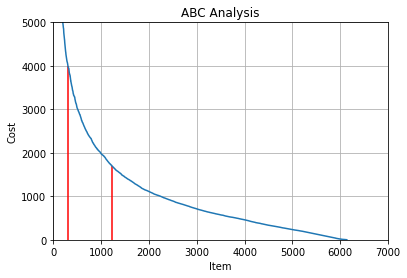

In [90]:
# Creating a Cost vs Item Chart for ABC Analysis
# 1st line is at 5%
# 2nd line is at 25%

performance =df['cost'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.vlines(x=0.05*6137, ymin=0, ymax=4000, color='r')
plt.vlines(x=0.2*6137, ymin=0, ymax=1700, color='r')

plt.xlim([0, 7000])
plt.ylim([0, 5000])

plt.ylabel('Cost')
plt.xlabel('Item')
plt.title('ABC Analysis')
plt.grid(True)

plt.show()

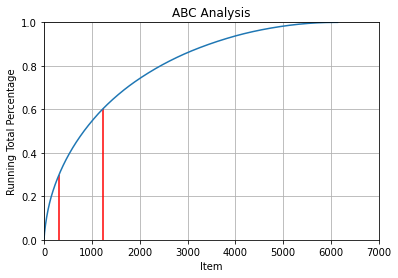

In [49]:
# Creating a Running Percentage vs Item Chart for ABC Analysis
# 1st line is at 5%
# 2nd line is at 25%

performance = df['cum_frac'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos,performance)
plt.vlines(x=0.05*6137, ymin=0, ymax=0.3, color='r')
plt.vlines(x=0.2*6137, ymin=0, ymax=0.6, color='r')
plt.xlim([0, 7000])
plt.ylim([0, 1])


plt.ylabel('Running Total Percentage')
plt.xlabel('Item')
plt.title('ABC Analysis')
plt.grid(True)
plt.show()

In [80]:
abc = pd.DataFrame()

abc["item_id"] = df["item_id"]
abc["Class"] = df["Class"]

abc

,item_id,Class
1350,HOUSEHOLD_1_272,A
267,HOUSEHOLD_1_053,A
383,HOUSEHOLD_1_072,A
2597,HOUSEHOLD_1_535,A
2595,HOUSEHOLD_1_535,A
...,...,...
5500,HOUSEHOLD_2_436,C
5970,HOUSEHOLD_2_504,C
5974,HOUSEHOLD_2_504,C
3013,HOUSEHOLD_2_053,C


In [81]:
# Calculating Coefficient of Variation for all the items
# COV = 100*(SD/Mean)

cov = pd.DataFrame()

cov["item_id"] = df["item_id"]
cov["cov"] = 100 * df["d_sd"] / df["d_mean"]

cov

,item_id,cov
1350,HOUSEHOLD_1_272,2.895229
267,HOUSEHOLD_1_053,1.288347
383,HOUSEHOLD_1_072,3.596583
2597,HOUSEHOLD_1_535,11.732006
2595,HOUSEHOLD_1_535,1.554980
...,...,...
5500,HOUSEHOLD_2_436,144.686992
5970,HOUSEHOLD_2_504,100.281922
5974,HOUSEHOLD_2_504,100.275388
3013,HOUSEHOLD_2_053,102.574216


Store with maximum volatility in sales demand

In [82]:
print(cov.loc[[cov['cov'].idxmax()]])

              item_id          cov
6088  HOUSEHOLD_2_073  1907.892743


In [83]:
cov_decending= cov.sort_values('cov', ascending=False)
cov_ascending= cov.sort_values('cov', ascending=True)

Top 5 stores with maximum volatility

In [84]:
cov_last_5 = cov_decending.head(5)
cov_last_5

,item_id,cov
4740,HOUSEHOLD_2_320,1907.892743
6088,HOUSEHOLD_2_073,1907.892743
6079,HOUSEHOLD_1_481,1907.892743
6081,HOUSEHOLD_1_481,1907.892743
6082,HOUSEHOLD_1_481,1907.892743


Top 5 stores with minimum volatility

In [85]:
cov_first_5 = cov_ascending.head(5)
cov_first_5

,item_id,cov
2005,HOUSEHOLD_1_410,0.126364
2151,HOUSEHOLD_1_438,0.223280
1223,HOUSEHOLD_1_234,0.233469
2459,HOUSEHOLD_1_506,0.312962
1250,HOUSEHOLD_1_243,0.322639


# Recommendations for Increasing Retail Business

## Inventory Optimization:

We developed the following recommendations for increasing Inventory efficiency. 

* Use more of the warehouse space for type "A" items by sacrificing the stock of type "B" and "C" items, as type "A" products are the ones that create the highest revenue share.

* Keep a steady stock of items with a low coefficient of variation as they are sold sustainably throughout the year.

* Stock of items with a very high coefficient of variation can be increased during its peak consumption time and kept very low during the off-season, like increasing the stock of decoration lights during the Christmas holidays and decreasing the stock for the rest of the year. 

## Sales Optimization

We developed the following recommendations for increasing the total sales of a shop.

* Stock of items whose sales are highly correlated with the weather data can be varied using weather forecast data. For example, items like woollen
can be increased in stock if there is a cold wave predicted.

* Stores located in areas with higher average income can keep an increased stock of premium products (mostly from categories "B" and "C") to maintain their supply.

* Increase the stock of all items, irrespective of classification, during weekends because that is when most sales happen.

## Cost analysis of the above initiatives

We propose to treat an item's cost as directly proportional to the inventory time it has to spend in the warehouse before being sold. The cost can be calculated by calculating the waste (difference in stock obtained and stock sold) on a per-time basis.

$$\text{Waste} = \text{Stock_Obtained}-\text{Stock_Sold}$$

$$\text{Cost} \propto \text{Waste}$$

The above-proposed cost can be used to calculate how risky it is to implement the above initiatives. If the cost of an initiative is higher than the reward it provides, it is not a viable decision to make.

### Inventory

* The first initiative does not increase the cost as the increase of stock of type "A" products is being done while reducing the stock of type "B" and "C" items.

* The second initiative does increase the cost as a steady supply of low Coefficnet of Variation items has to be supplied, but as the items are proven to be in steady demand, the reward of implementing the strategy outweighs the increase in the cost.

* The third initiative only increases the cost during rush periods like holiday seasons, but as they are known periods of high sales, the read outweighs the cost.

### Cost

* The first initiative increases the cost during the periods of seasonal product requirement, but most of the sales of such products only happen during that particular period. The reward outweighs the cost.

* The second initiative increases the cost for shops located in higher-income areas, but as the customers in this area are assumed to have a higher purchasing power, we can safely assume that the reward in increased sales would outweigh the cost.

* The third initiative increases the operational cost during the weekends, but as weekends observe an increase in sales, the reward obtained outweighs the additional cost.